# 互评作业3：分类与预测

姓名：臧梓硕

学号：3120191072

学院：计算机学院

GitHub:https://github.com/zzsynl126/data_mining_3

# 目录

## 选用数据集：Video Game Sales

## 1. 数据集介绍和预处理
  
    1.1 数据集介绍
  
    1.2 数据集缺失值处理

## 2. 电子游戏市场分析

    2.1 数量分析受欢迎程度
  
    2.2 销售额分析受欢迎程度

## 3. 可视化：展示销售故事
  
    3.1 销售额
  
    3.2 游戏
      
    3.3 发行平台
  
    3.4 发行商
    
    3.5 总结

## 4. 预测每年电子游戏销售额
  
    4.1 时序分析预测
  
    4.2 多特征预测


## 1 数据集介绍


### 1.1 数据集介绍

本次作业选用的数据集为Video Game Sales,该数据集包含销售量超过100,000个的视频游戏列表。它是由vgchartz.com的刮擦生成的。

该数据集包括11个字段，分别为

（1）**Rank**-整体销售排名、（2）**Name**-游戏名称、（3）**Platform**-游戏发行平台、（4）**Year**-游戏发行年份

（5）**Genre**-游戏类型、（6）**Publisher**-游戏的发布商、（7）**NA_Sales**-北美销售（百万）、（8）**EU_Sales**-欧洲的销售额（百万）、

（9）**JP_Sales**-在日本的销售额（百万）、（10）**Other_Sales**-世界其他地区的销售额（百万）、（11）**Global_Sales**-全球总销售额。

该数据集集有16598条数据。首先对数据集进行展示。

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('./data/vgsales.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


我们可以看到数据共11个属性列，包括16598条数据。

因为数据本身按照销售额进行了排序，因此展示的前五条数据也是销售额最高的五条数据。

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



下面对游戏名称、游戏发布者、游戏版本的平台、游戏类型进行数量统计。

In [4]:
G_name=data['Name'].unique()
print("Number of games: ", len(G_name))
publishers = data['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = data['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres = data['Genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  11493
Number of publishers:  579
Number of platforms:  31
Number of genres:  12


以上是数量统计的结果，我们可以看到游戏名称的数量是比数据量少的，通过查看数据集可以发现这是因为一些游戏在多个平台上发布，这些为独立的数据。


### 1.2 数据集缺失值处理

下面我们对数据集进行预处理。首先我们计算空值的数目

In [5]:
print(data.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


从上面的结果可以看到，**-Year**中有271个缺失值，**Publisher**中有58个缺失值,由于这些值数量较少，所占比例小于2%，因此采用去除缺失值的方法进行数据缺失值的处理不会影响平衡。下面我们去除缺失值，对新数据各标称属性的数量进行统计。处理后的数据存入**vgsales_new.csv**文件。

In [6]:
data = data.dropna()

In [7]:
print("Number of data: ",len(data))
G_name=data['Name'].unique()
print("Number of games: ", len(G_name))
publishers = data['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = data['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres = data['Genre'].unique()
print("Number of genres: ", len(genres))

Number of data:  16291
Number of games:  11325
Number of publishers:  576
Number of platforms:  31
Number of genres:  12


In [8]:
print(data.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [9]:
data.to_csv('./data/vgsales_new.csv')

## 2 电子游戏市场分析

下面从最受欢迎的游戏、游戏类型、用户喜爱的发行平台以及发行人等方面进行数据分析。

首先我们根据统计数量进行分析。

### 2.1 数量分析受欢迎程度

#### 游戏数量统计分析

首先我们对游戏本身进行分析，并对其中的前10名进行展示。

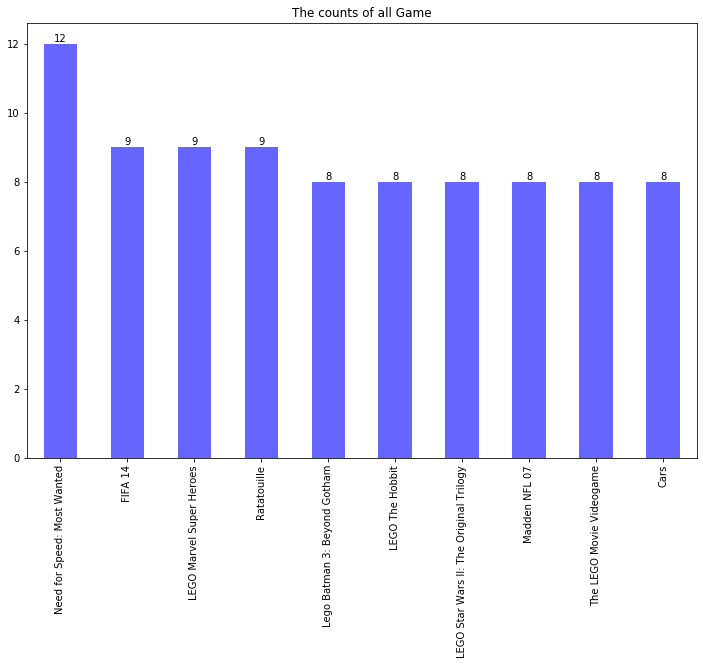

In [10]:
name=pd.DataFrame(data['Name'].value_counts()[:10])

name.plot(kind='bar',alpha=0.6,color='Blue',figsize=(12,8),
legend=False,
title='The counts of all Game')

a=np.arange(len(data))   
for index,count in zip(a,name['Name']):
    plt.text(index,count,count,ha='center',va='bottom')
    
plt.show()


我们可以看到，游戏**Need for Speed:Most Wanted**出现的次数最多。通过对原数据的分析，同一游戏出现多次的原因在于发布的平台不同或者是发布时间不同，这也反映了游戏是比较受欢迎的，同时游戏兼容的平台也较多。

#### 游戏类型数量统计分析

下面我们对游戏类型进行数量上的分析。

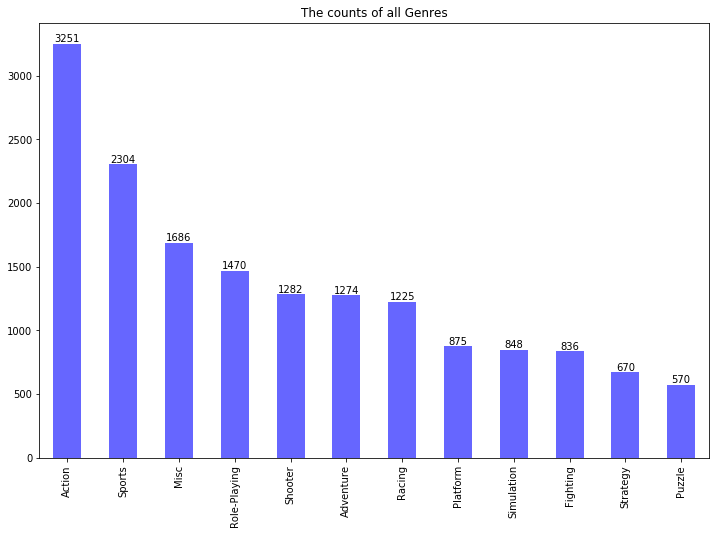

In [11]:
types=pd.DataFrame(data['Genre'].value_counts())

types.plot(kind='bar',alpha=0.6,color='Blue',figsize=(12,8),
legend=False,
title='The counts of all Genres')

a=np.arange(len(data))   #添加数据标签
for index,count in zip(a,types['Genre']):
    plt.text(index,count,count,ha='center',va='bottom')
    
plt.show()


上面的结果图为销售数据中所有游戏类别的数量展示图，其中**Action**类游戏最受人们喜爱，其次是**Sports**类游戏。

#### 发行平台数量统计分析

下面我们对发行平台进行数据统计，并展示前10名。

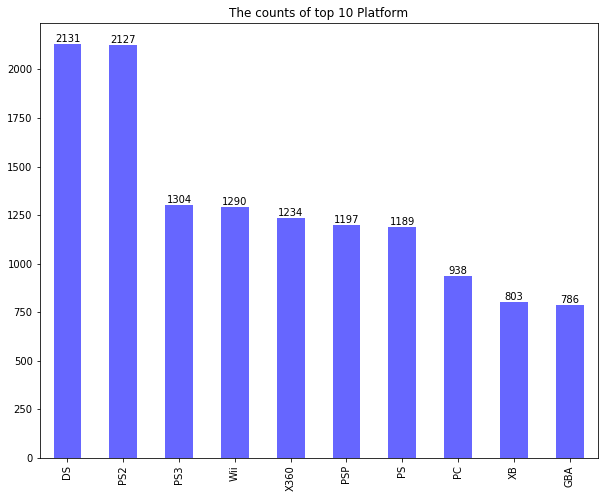

In [12]:
platform=pd.DataFrame(data['Platform'].value_counts()[:10])

platform.plot(kind='bar',alpha=0.6,color='Blue',figsize=(10,8),
legend=False,
title='The counts of top 10 Platform')
a=np.arange(len(data))   
for index,count in zip(a,platform['Platform']):
    plt.text(index,count,count,ha='center',va='bottom')
plt.show()


上面就是销售量超过100,000个的视频游戏中前十名的发布平台，从柱状图我们可以看到占比比较高的发布平台是DS和PS2，分别为2131个和2127个。

#### 发行商数量统计分析

下面我们对发行商进行统计分析并展示其中的前10名。

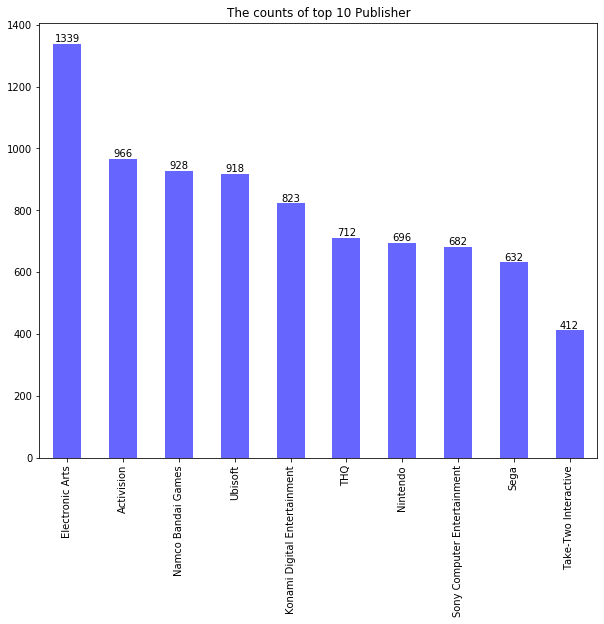

In [13]:
publisher=pd.DataFrame(data['Publisher'].value_counts()[:10])

publisher.plot(kind='bar',alpha=0.6,color='Blue',figsize=(10,8),
legend=False,
title='The counts of top 10 Publisher')
a=np.arange(len(data))   
for index,count in zip(a,publisher['Publisher']):
    plt.text(index,count,count,ha='center',va='bottom')
plt.show()

从上面的直方图我们可以看到销售量超过100,000个的视频游戏列表中数量最多的发布商是Electronic Arts。但通过对原始数据进行分析我们可以发现，在不同平台发布的同一款游戏均是不同数据进行存储，但这些数据具有相同的发布者，因此下面我们去除重复的这些数据再次进行统计。

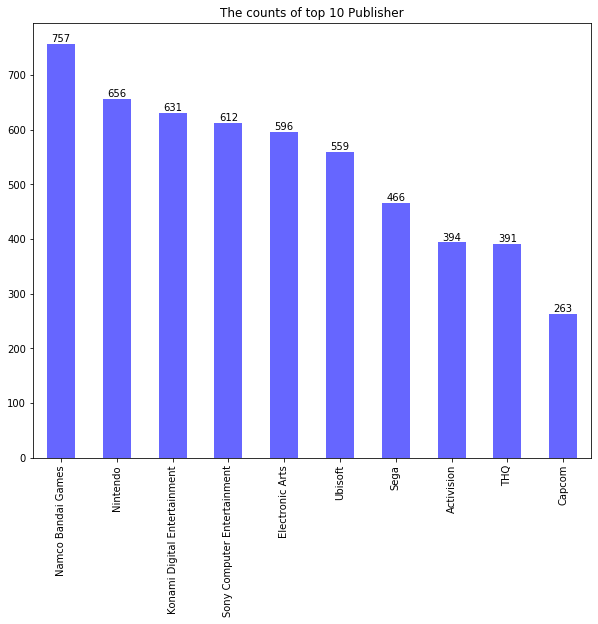

In [14]:
data_d=data.drop_duplicates('Name')
publisher=pd.DataFrame(data_d['Publisher'].value_counts()[:10])

publisher.plot(kind='bar',alpha=0.6,color='Blue',figsize=(10,8),
legend=False,
title='The counts of top 10 Publisher')
a=np.arange(len(data_d))   
for index,count in zip(a,publisher['Publisher']):
    plt.text(index,count,count,ha='center',va='bottom')
plt.show()

从上面可以看到，去除重复数据之后销售量超过100,000个的视频游戏列表中数量最多的发布商是Namco Bandai Games， 而Electronic Arts 有所下降，但仍然比较受欢迎。同时可以从另一个角度对结果进行分析，数量的变化也说明了Electronic Arts发布的游戏不仅仅比较受欢迎，同时所兼顾的平台也是比较多的。

数量上的统计在一定程度上反应了受欢迎的程度。通过上面的分析，我们可以认为在电子游戏市场中动作类游戏是比较热销的，人们也更多的愿意在DS和PS2平台上进行。发行商Electronic Arts发行的游戏得到了比较高的认可度，并且所兼容的平台也比较多，此外Namco Bandai Games发行的游戏同样受到欢迎。

### 2.2 销售额分析受欢迎程度

上面我们是根据数量上所占的比例对电子游戏市场进行的分析，但针对数据的特点，我们仅仅利用数量的多少来衡量受欢迎程度存在一些片面性，也就是说类别数较多也不一定最受欢迎。因此接下来我们从销售额角度对市场进行分析。销售额虽然受游戏定价影响，但也蕴含着受欢迎的程度，同时这是市场更加关注的。下面我们就以全球总销售额为纵轴分别展示不同游戏、不同类别、不同平台、不同发行商的受欢迎程度，为了方便展示这里我们只展示前5名。

### 销售总额分析

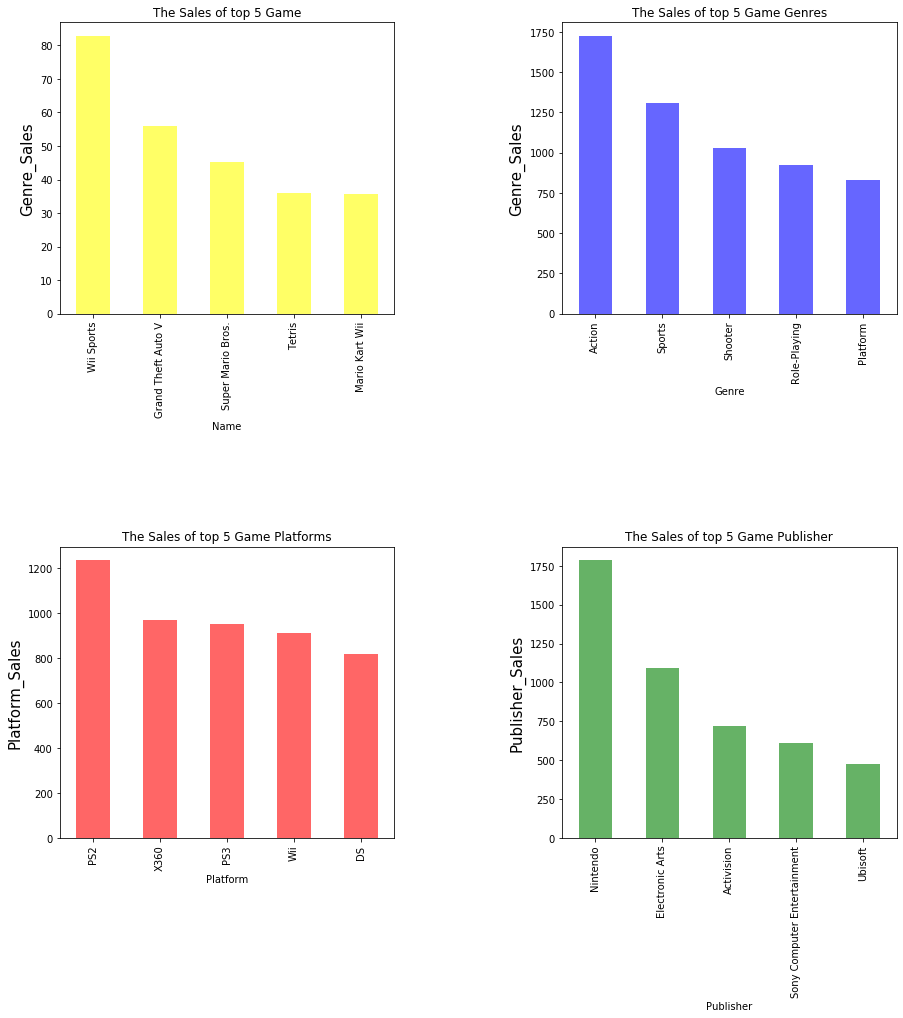

In [15]:
f,ax=plt.subplots(2,2,figsize=(15,15))


name=pd.DataFrame(data.groupby('Name').agg({'Global_Sales':np.sum})).sort_values(by='Global_Sales',ascending=False)[:5]
                                                                                                   
types=pd.DataFrame(data.groupby('Genre').agg({'Global_Sales':np.sum})).sort_values(by='Global_Sales',ascending=False)[:5]
                                                                                                   
platform=pd.DataFrame(data.groupby('Platform').agg({'Global_Sales':np.sum})).sort_values(by='Global_Sales',ascending=False)[:5] 
                                                                                                         
publisher=pd.DataFrame(data.groupby('Publisher').agg({'Global_Sales':np.sum})).sort_values(by='Global_Sales',ascending=False)[:5]
                                                                                 
font={'family':'DejaVu Sans','weight':'normal','size':15}

name.plot(kind='bar',alpha=0.6,color='Yellow',title='The Sales of top 5 Game',ax=ax[0][0],legend=False)
ax[0][0].set_ylabel('Genre_Sales',font)
types.plot(kind='bar',alpha=0.6,color='Blue',title='The Sales of top 5 Game Genres',ax=ax[0][1],legend=False)
ax[0][1].set_ylabel('Genre_Sales',font)

platform.plot(kind='bar',alpha=0.6,color='red',title='The Sales of top 5 Game Platforms',ax=ax[1][0],legend=False)
ax[1][0].set_ylabel('Platform_Sales',font)

publisher.plot(kind='bar',alpha=0.6,color='Green',title='The Sales of top 5 Game Publisher',ax=ax[1][1],legend=False)
ax[1][1].set_ylabel('Publisher_Sales',font)    

plt.subplots_adjust(wspace=0.5,hspace=0.8)  
plt.show()

上面分别为不同游戏、游戏类别、平台以及发布商按照销售额进行排序的前五名。从上面我们就可以看到销售额最高的游戏为Wii Sports, 销售额最高的游戏类型还是Action类游戏，PS2平台的销售总额是最高的，Nintendo是总销售额最高的发行商。

通过对销售总额的分析，我们可以看到对于游戏的游戏类型不论是从种类数据统计以及总销售额统计来看Action均为较受欢迎的，平台方面PS2普遍收到欢迎。

### 按照地区进行分析

我们可以看到数据集中按地区统计了销售额，因此我们进一步按地区查看受欢迎的游戏类型、平台以及发行商。这里我们主演分析北美、欧洲、日本三个主要区域的销售额。

#### 游戏类型地区销售额分析

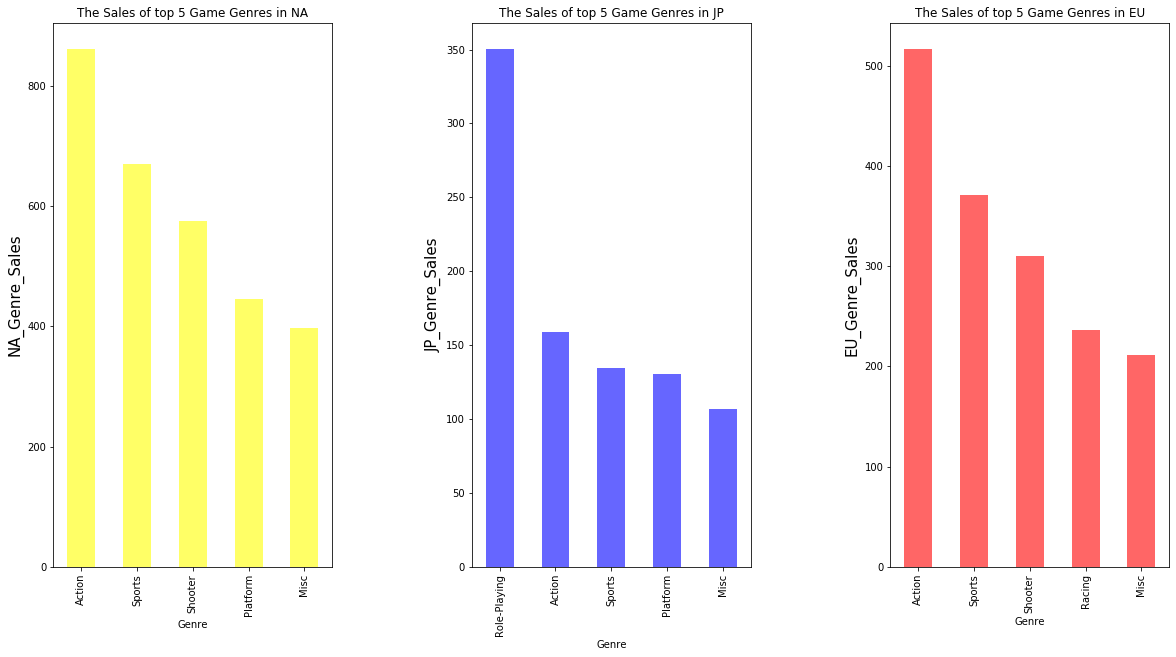

In [16]:
f,ax=plt.subplots(1,3,figsize=(20,10))


N_P=pd.DataFrame(data.groupby('Genre').agg({'NA_Sales':np.sum})).sort_values(by='NA_Sales',ascending=False)[:5]
                                                                                                   
J_P=pd.DataFrame(data.groupby('Genre').agg({'JP_Sales':np.sum})).sort_values(by='JP_Sales',ascending=False)[:5]
                                                                                                   
E_P=pd.DataFrame(data.groupby('Genre').agg({'EU_Sales':np.sum})).sort_values(by='EU_Sales',ascending=False)[:5] 
                                                                                                         
                                                                                 
font={'family':'DejaVu Sans','weight':'normal','size':15}

N_P.plot(kind='bar',alpha=0.6,color='Yellow',title='The Sales of top 5 Game Genres in NA',ax=ax[0],legend=False)
ax[0].set_ylabel('NA_Genre_Sales',font)
J_P.plot(kind='bar',alpha=0.6,color='Blue',title='The Sales of top 5 Game Genres in JP',ax=ax[1],legend=False)
ax[1].set_ylabel('JP_Genre_Sales',font)

E_P.plot(kind='bar',alpha=0.6,color='red',title='The Sales of top 5 Game Genres in EU',ax=ax[2],legend=False)
ax[2].set_ylabel('EU_Genre_Sales',font)

plt.subplots_adjust(wspace=0.5,hspace=0.8)  
plt.show()

从上面的统计结果我们可以看到在北美和欧洲动作类游戏销售额较高，说明较受人们欢迎，但在日本地区销售额最高的是角色扮演类游戏。人们对于游戏的偏爱是会受到文化影响的，因此欧美地区和日本地区的差异也符合我们对他们文化的认知。除此之外在欧美的销售额较日本地区高

#### 平台地区销售分析

下面我们针对不同平台在不同地区的销售额对比，同样展示前五名。

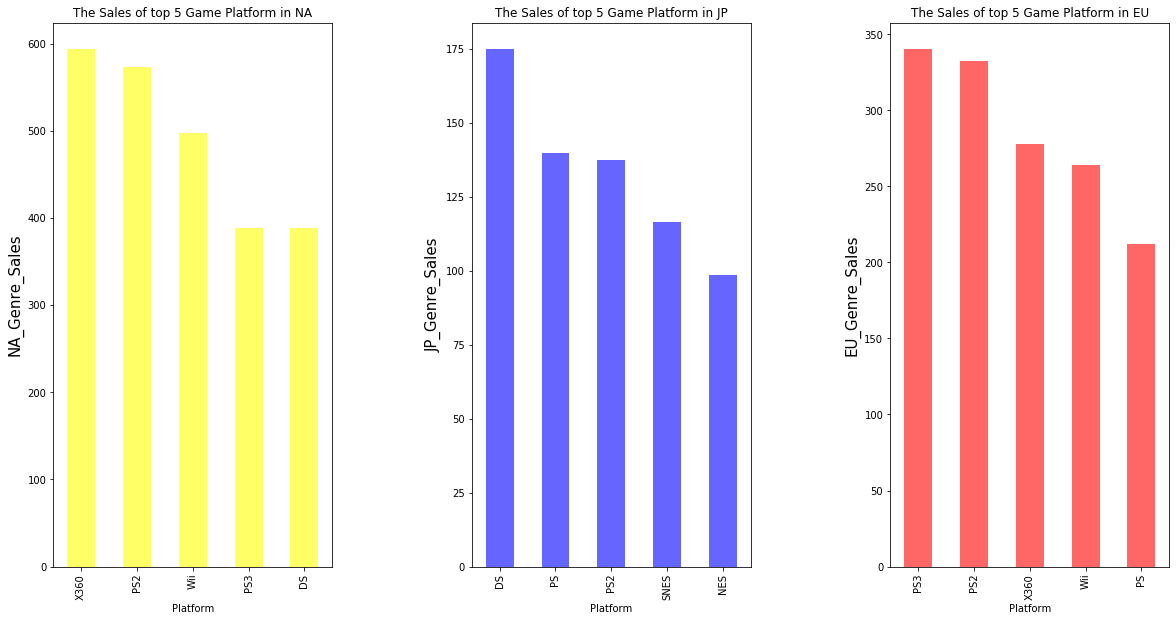

In [17]:
f,ax=plt.subplots(1,3,figsize=(20,10))


N_P=pd.DataFrame(data.groupby('Platform').agg({'NA_Sales':np.sum})).sort_values(by='NA_Sales',ascending=False)[:5]
                                                                                                   
J_P=pd.DataFrame(data.groupby('Platform').agg({'JP_Sales':np.sum})).sort_values(by='JP_Sales',ascending=False)[:5]
                                                                                                   
E_P=pd.DataFrame(data.groupby('Platform').agg({'EU_Sales':np.sum})).sort_values(by='EU_Sales',ascending=False)[:5] 
                                                                                                         
                                                                                 
font={'family':'DejaVu Sans','weight':'normal','size':15}

N_P.plot(kind='bar',alpha=0.6,color='Yellow',title='The Sales of top 5 Game Platform in NA',ax=ax[0],legend=False)
ax[0].set_ylabel('NA_Genre_Sales',font)
J_P.plot(kind='bar',alpha=0.6,color='Blue',title='The Sales of top 5 Game Platform in JP',ax=ax[1],legend=False)
ax[1].set_ylabel('JP_Genre_Sales',font)

E_P.plot(kind='bar',alpha=0.6,color='red',title='The Sales of top 5 Game Platform in EU',ax=ax[2],legend=False)
ax[2].set_ylabel('EU_Genre_Sales',font)

plt.subplots_adjust(wspace=0.5,hspace=0.8)  
plt.show()

从上面的结果我们可以看出三大地区销售额最高的平台都不相同，但是X360、PS平台均出现在地区销售的前五名。在欧洲地区多个PS平台受到了人们的欢迎。

#### 发行商地区销售分析

接下来我们就对不同地区对于发行商的喜爱程度进行分析。

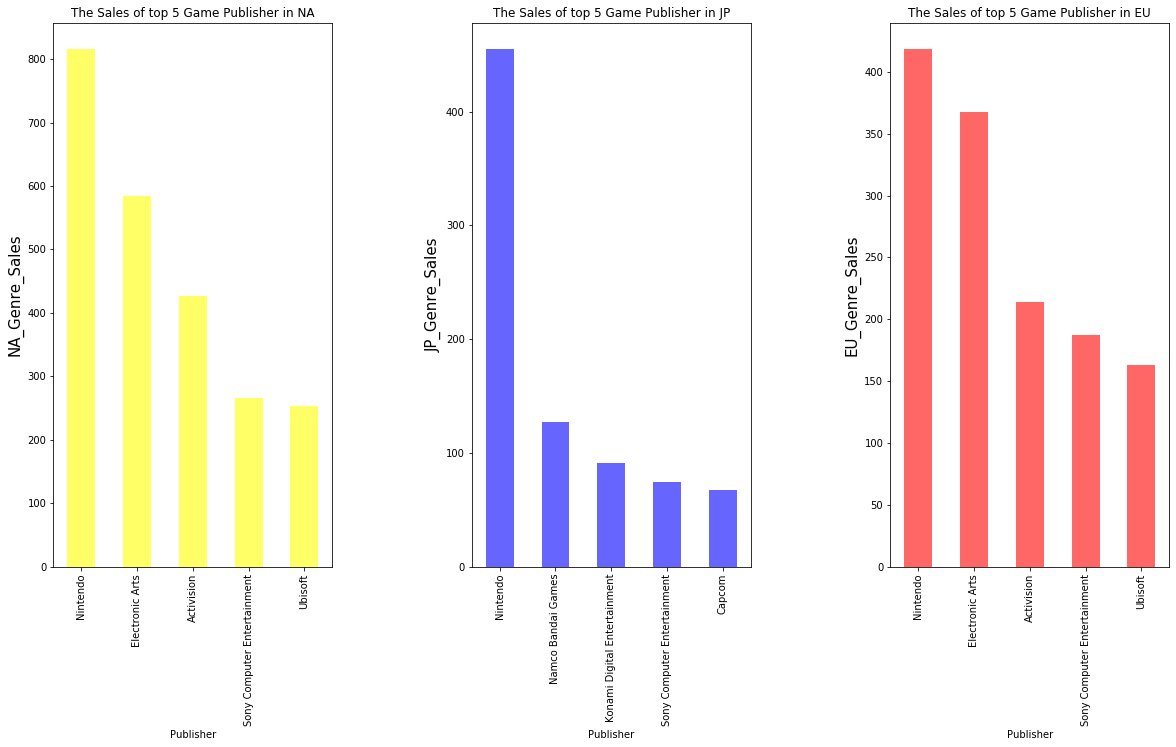

In [18]:
f,ax=plt.subplots(1,3,figsize=(20,10))


N_P=pd.DataFrame(data.groupby('Publisher').agg({'NA_Sales':np.sum})).sort_values(by='NA_Sales',ascending=False)[:5]
                                                                                                   
J_P=pd.DataFrame(data.groupby('Publisher').agg({'JP_Sales':np.sum})).sort_values(by='JP_Sales',ascending=False)[:5]
                                                                                                   
E_P=pd.DataFrame(data.groupby('Publisher').agg({'EU_Sales':np.sum})).sort_values(by='EU_Sales',ascending=False)[:5] 
                                                                                                         
                                                                                 
font={'family':'DejaVu Sans','weight':'normal','size':15}

N_P.plot(kind='bar',alpha=0.6,color='Yellow',title='The Sales of top 5 Game Publisher in NA',ax=ax[0],legend=False)
ax[0].set_ylabel('NA_Genre_Sales',font)
J_P.plot(kind='bar',alpha=0.6,color='Blue',title='The Sales of top 5 Game Publisher in JP',ax=ax[1],legend=False)
ax[1].set_ylabel('JP_Genre_Sales',font)

E_P.plot(kind='bar',alpha=0.6,color='red',title='The Sales of top 5 Game Publisher in EU',ax=ax[2],legend=False)
ax[2].set_ylabel('EU_Genre_Sales',font)

plt.subplots_adjust(wspace=0.5,hspace=0.8)  
plt.show()

从上面的结果我们可以看出在三大地区Nintendo的销售额均是最高的，除此之外可以看出任天堂所占的市场份额之大。同时欧美两大地区有相似的偏好，而在日本地区占更大市场份额的包括本土的游戏公司索尼等。

## 3. 可视化：展示销售故事

第一部分已经针对游戏、类型、发布平台、发行人等分别从销售额及数量进行了分析并且利用直方图的形式进行了可视化，因此在这一节中我们主要将目光聚焦于整体的情况，从销售额、游戏、平台以以及发行人在时间、所占市场等方面展示销售故事。

### 3.1 销售额

首先我们对每年的销售总额的趋势进行分析。

#### 全球总销售额趋势

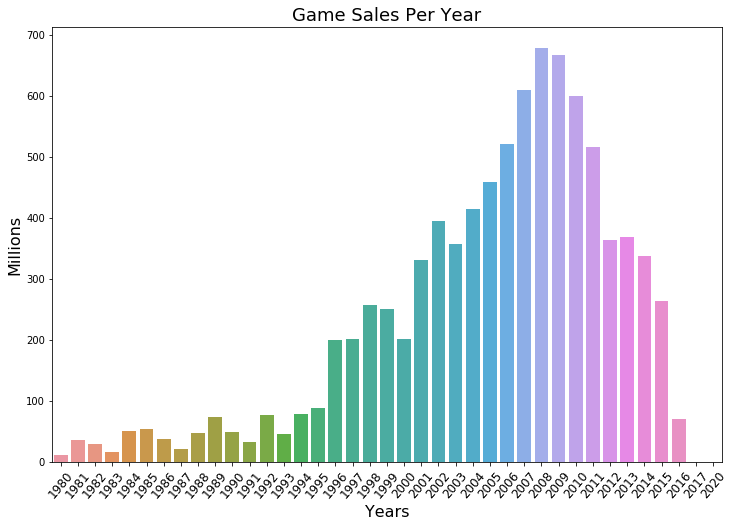

In [19]:
y = data.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y ,x = x)
ax.set_xlabel(xlabel = 'Years', fontsize =16)
ax.set_xticklabels(labels = x ,fontsize =12 , rotation = 50)
ax.set_ylabel(ylabel='Millions', fontsize=16)
ax.set_title(label='Game Sales Per Year', fontsize=18)
plt.show();


从上面的结果我们可以看到从1996年开始，视频游戏的销售额开始逐年递增，2001-2008这件增幅明显，并于2008年达到峰值。这是因为在这段时间内技术提高，游戏公司数量增多，因此人们对视频游戏的需求也越大。但在2009年之后销量开始减少，尤其是在2011-2012这段时间内呈现断崖式降低。初步分析这可能是因为手机游戏占据了一部分游戏市场，因此视频游戏的市场份额有所下降。

#### 地区销售额趋势

接下来我们分析一下三大主要地区的销售量趋势。

Text(0.5, 1.0, 'The sales of Three aspects')

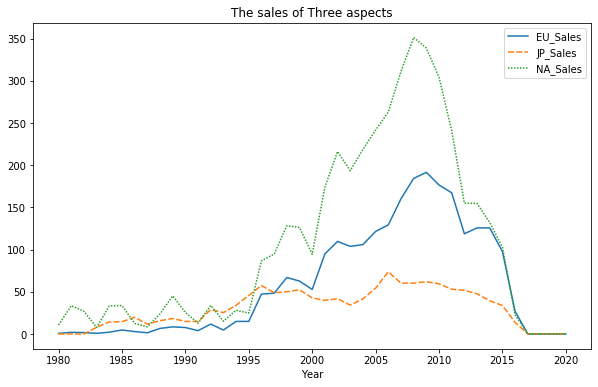

In [20]:
M=['NA_Sales','EU_Sales','JP_Sales']
df5market_p=pd.pivot_table(data,index='Year',values=M,aggfunc=np.sum)
fig=plt.figure(figsize=(10,6))
sns.lineplot(data=df5market_p)
plt.title('The sales of Three aspects')

从记录的数据看，北美市场一直是视频游戏的重要市场，同时各地区的销售趋势大致相同，并且和全球销售额的走势相近。从2010年之后视频游戏在各大地区的销售额均在下滑。

从销售额看近几年视频游戏市场较为低迷，可能受设备多样化的影响。此外北美地区一直是视频游戏的重要市场，这可能和地区的科技发展有关系。

### 3.2 游戏

下面我们探索一下游戏及类型相关的信息。

#### 每年发布的游戏数量

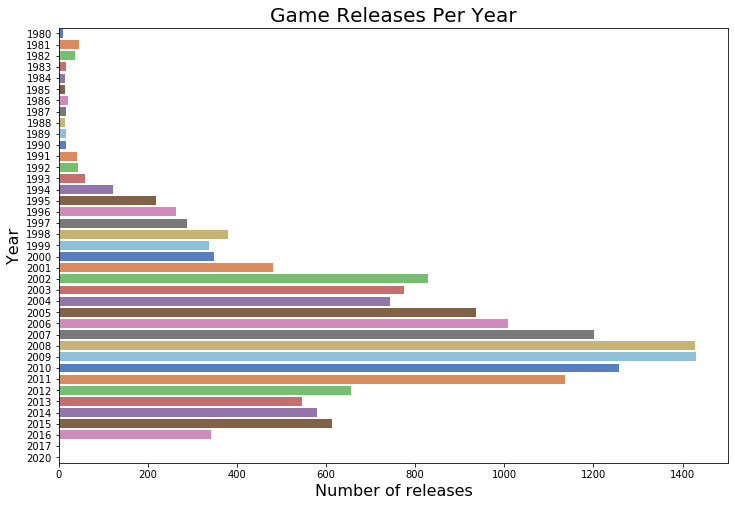

In [21]:
x = data.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y ,x = x,orient='h',palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

可以明显的看出每年游戏发布的数量趋势和销售额的趋势是基本相似的，这也可以说明为什么销售额会在2010年之后出现下降，其中也有新游戏较少的原因。

下面我们对每年销售额最高的游戏类型进行分析。

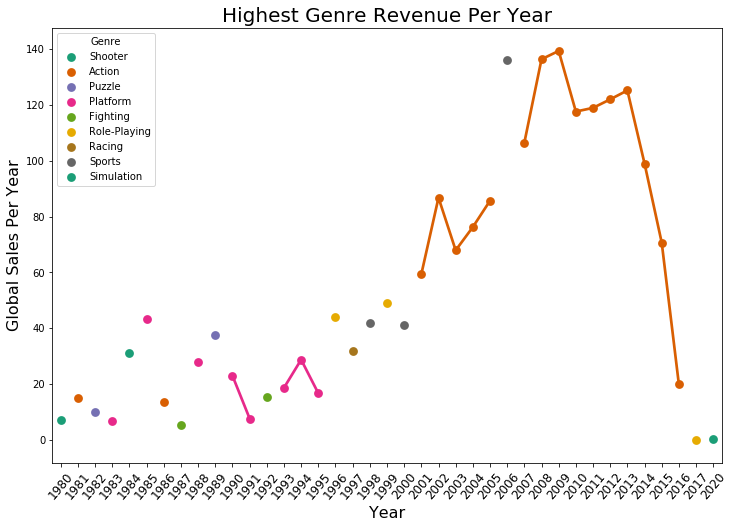

In [22]:
table = data.pivot_table('Global_Sales', index='Genre', columns='Year', aggfunc='sum')
genres = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data_s = pd.concat([genres, sales], axis=1)
data_s.columns = ['Genre', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales', x = years, hue='Genre', data=data_s, size=15, palette='Dark2')
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Global Sales Per Year', fontsize=16)
ax.set_title(label='Highest Genre Revenue Per Year', fontsize=20)
ax.set_xticklabels(labels = years, fontsize=12, rotation=50)
plt.show();

从上图我们可以看出在初期并没有明显的游戏偏向，但到了2000年之后，action类游戏占有的市场份额更高，尤其是2006年之后，占有市场份额最高的游戏就是action类游戏。

### 3.3 发行平台

市场上有众多发行平台，那么谁是其中的占比最高的平台呢？因为2010可以看作是一个转折点，所以我们将数据分为2010前后两部分数据进行分析。

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


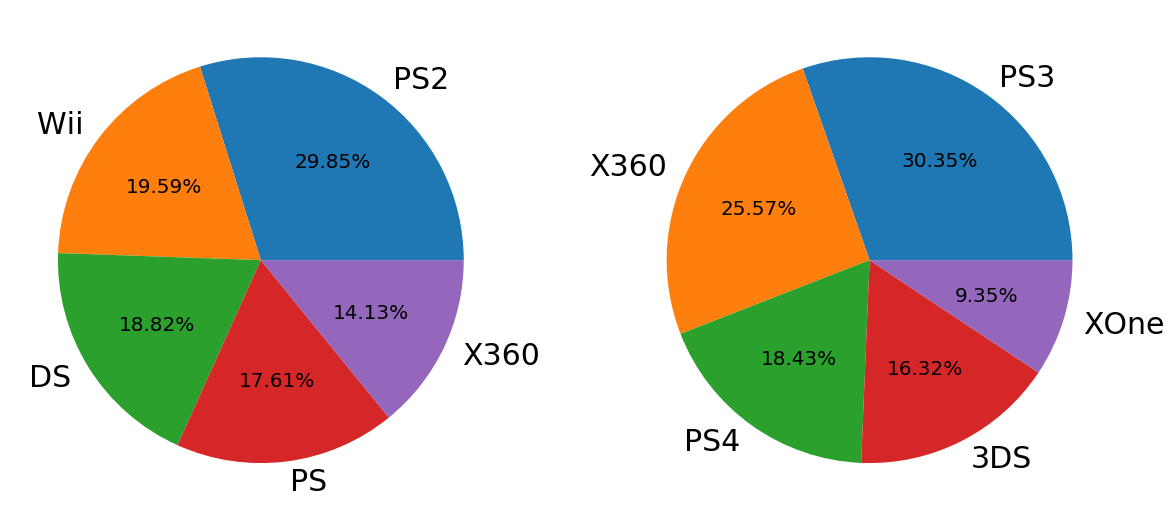

In [23]:
PLAT_1980=data[data['Year']<=2010]
PLAT_1980=pd.pivot_table(data=PLAT_1980,index='Platform',values='Global_Sales',aggfunc=np.sum)
PLAT_1980=PLAT_1980.sort_values(by='Global_Sales',ascending=False)

PLAT_2010=data[data['Year']>2010]
PLAT_2010=pd.pivot_table(data=PLAT_2010,index='Platform',values='Global_Sales',aggfunc=np.sum)
PLAT_2010=PLAT_2010.sort_values(by='Global_Sales',ascending=False)

f,ax=plt.subplots(1,2,figsize=(20,10))
axes = ax.flatten() #子图展平
patches,l_text,p_text=axes[0].pie(PLAT_1980.head().values, labels=PLAT_1980.head().index, autopct="%1.2f%%")
for t in l_text:

    t.set_size(30)

for t in p_text:

    t.set_size(20)
patches,l_text,p_text=axes[1].pie(PLAT_2010.head().values, labels=PLAT_2010.head().index, autopct="%1.2f%%")
for t in l_text:

    t.set_size(30)

for t in p_text:

    t.set_size(20)
plt.show()
#from pyecharts import Pie
#pie = Pie("发行商饼状图", "2010前后比较",title_pos='right',width=900,height=300)
#pie.add("1980-2010", PLAT_1980.head().index, PLAT_1980.head().values ,center=[25,50],is_legend_show=False,is_label_show=True)
#pie.add("2011-2020", PLAT_2010.head().index, PLAT_2010.head().values ,center=[75,50],is_legend_show=False,is_label_show=True)

饼图中就是占据市场份额最高的前五个平台。在2010年之前PS2平台所占的市场份额是最高的，2010年之后PS3所占的市场份额增加。总的来说在视频游戏平台占市场份额高的仍然是PS系列。

### 3.4 发行商

#### 发行商每年所占市场份额

发行商是发行游戏的主要盈利人，因此发行的游戏的销售额对于发行商来说至关重要。
第四部分我们对发行商进行分析。同样我们对比2010年前后的数据进行各个发行商市场份额的探究。

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


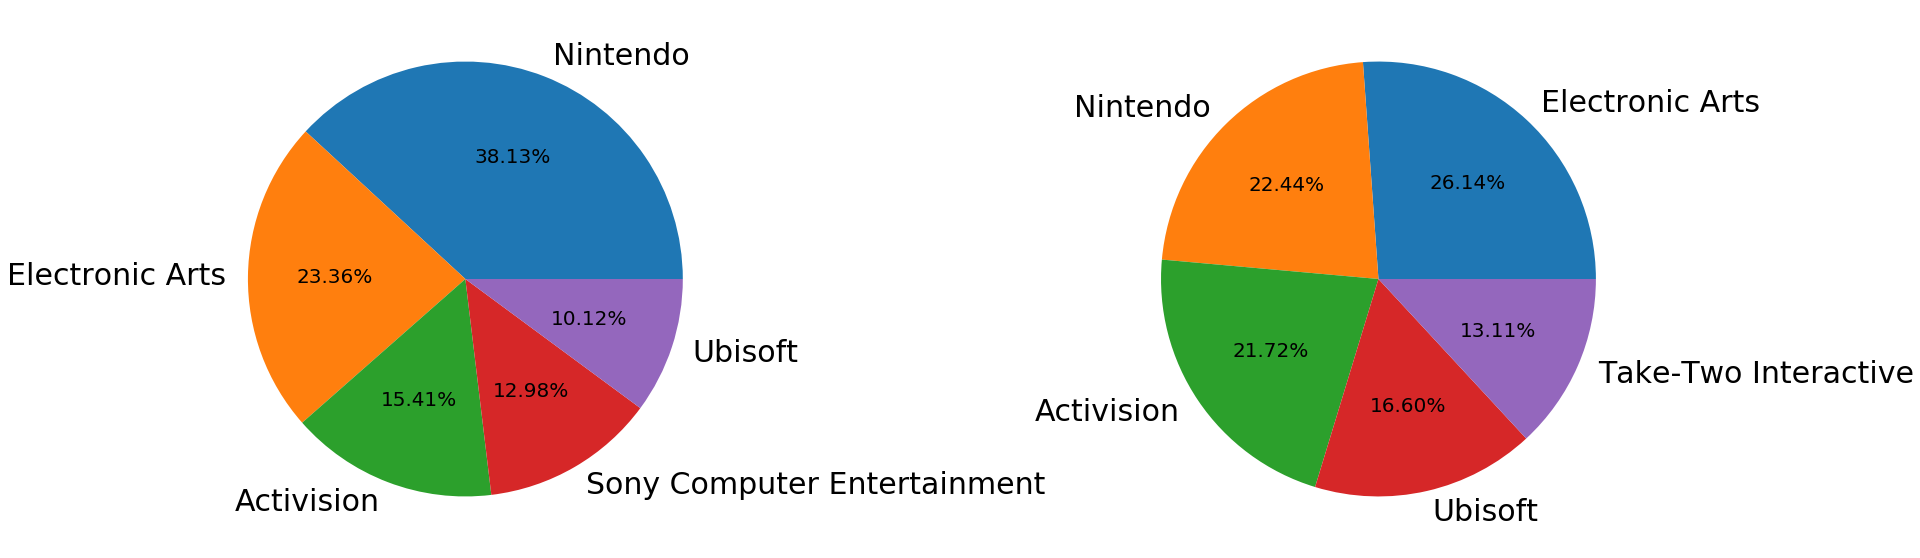

In [24]:
PBL_1980=data[data['Year']<=2010]
PBL_1980=pd.pivot_table(data=data,index='Publisher',values='Global_Sales',aggfunc=np.sum)
PBL_1980=PBL_1980.sort_values(by='Global_Sales',ascending=False)
PBL_2010=data[data['Year']>2010]
PBL_2010=pd.pivot_table(data=PBL_2010,index='Publisher',values='Global_Sales',aggfunc=np.sum)
PBL_2010=PBL_2010.sort_values(by='Global_Sales',ascending=False)

f,ax=plt.subplots(1,2,figsize=(30,10))
axes = ax.flatten() #子图展平
patches,l_text,p_text=axes[0].pie(PBL_1980.head().values, labels=PBL_1980.head().index, autopct="%1.2f%%")
for t in l_text:

    t.set_size(30)

for t in p_text:

    t.set_size(20)
patches,l_text,p_text=axes[1].pie(PBL_2010.head().values, labels=PBL_2010.head().index, autopct="%1.2f%%")
for t in l_text:

    t.set_size(30)

for t in p_text:

    t.set_size(20)
plt.show()

我们可以看到，在2010年之前占市场份额最高的是Nintendo,在2010年之后Electronic Arts的市场占比提高，和任天堂所占市场份额差距不大。并且总体来看在2010年之后Nintendo、Electronic Arts以及Activision三家发行商所占份额大致呈三足鼎立的情况。

#### 主要发行商所占市场份额

接下来我们对2010年之后主要的发行商所占市场份额进行分析。

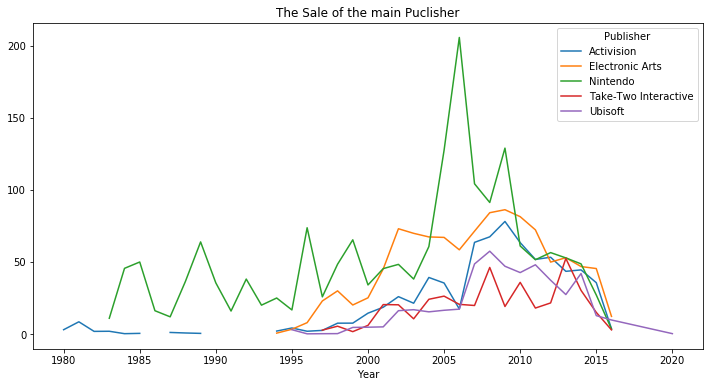

In [25]:
P=['Nintendo','Electronic Arts','Activision','Take-Two Interactive','Ubisoft']
df5PBL=data[data['Publisher'].isin(P)]
df5PBL_p=pd.pivot_table(data=df5PBL,index='Year',columns='Publisher',values='Global_Sales',aggfunc=np.sum)
df5PBL_p.plot(title='The Sale of the main Puclisher',figsize=(12,6))

任天堂所占的市场份额比较高，并且在2006年时占的市场份额明显高于其他公司，但在2010年之后各大发行商的销售额同样在减少,并且所占市场份额区域平衡。

#### 各大发行商在每类游戏所占市场份额

那么各大发行商在每类游戏所占的市场份额如何呢？

In [26]:
df5PBL_G_M_p=pd.pivot_table(data=df5PBL,index=['Genre','Publisher'],values='Global_Sales',aggfunc=np.sum)
df5PBL_G_M_p.sort_values(by=['Genre','Global_Sales'],ascending=False).head()
df5PBL_G_M_p

Global_Sales
Genre        Publisher                         
Action       Activision                  141.82
             Electronic Arts             115.34
             Nintendo                    128.10
             Take-Two Interactive        211.08
             Ubisoft                     142.94
Adventure    Activision                    5.42
             Electronic Arts               4.75
             Nintendo                     35.71
             Take-Two Interactive          7.56
             Ubisoft                      22.19
Fighting     Activision                    2.86
             Electronic Arts              30.85
             Nintendo                     53.35
             Take-Two Interactive          0.06
             Ubisoft                       6.90
Misc         Activision                   76.55
             Electronic Arts              19.74
             Nintendo                    180.67
             Take-Two Interactive         10.58
             Ubisoft                      97.53
Platform     Activision                   33.40
             Electronic Arts               6.53
             Nintendo                    426.18
             Take-Two Interactive          3.34
             Ubisoft                      21.06
Puzzle       Activision                    1.06
             Electronic Arts               4.55
             Nintendo                    124.88
             Take-Two Interactive          0.07
             Ubisoft                       6.33
Racing       Activision                   16.99
             Electronic Arts             145.77
             Nintendo                    151.30
             Take-Two Interactive         21.25
             Ubisoft                      15.83
Role-Playing Activision                   46.79
             Electronic Arts              35.30
             Nintendo                    284.57
             Take-Two Interactive          6.07
             Ubisoft                      16.76
Shooter      Activision                  295.40
             Electronic Arts             158.26
             Nintendo                     69.69
             Take-Two Interactive         54.23
             Ubisoft                      67.65
Simulation   Activision                    8.26
             Electronic Arts              89.53
             Nintendo                     85.25
             Take-Two Interactive          0.89
             Ubisoft                      44.48
Sports       Activision                   75.16
             Electronic Arts             468.69
             Nintendo                    218.01
             Take-Two Interactive         76.77
             Ubisoft                      23.42
Strategy     Activision                   17.70
             Electronic Arts              14.08
             Nintendo                     26.72
             Take-Two Interactive          7.40
             Ubisoft                       8.45

从上面的表格可以看出任天堂在大部分游戏类别中所占的销售份额都是最高的，足以看出它所涉及的范围之广，这也是任天堂作为龙头公司的原因所在。其次在最受欢迎的动作类游戏中Activision所占市场份额最高。

#### 各大发行商发行最多的游戏类别

下面我们再分析一下从游戏发行数量上各个发行商发行最多的游戏类别是什么。

In [27]:
#G_conut=pd.DataFrame(data_d['Genre'].value_counts())
df5PBL_G_M_p=pd.pivot_table(data=df5PBL,index=['Genre','Publisher'],values='Name',aggfunc='count')
df5PBL_G_M_p.sort_values(by=['Genre'],ascending=False).head()
df5PBL_G_M_p

Name
Genre        Publisher                 
Action       Activision             308
             Electronic Arts        182
             Nintendo                78
             Take-Two Interactive    93
             Ubisoft                193
Adventure    Activision              25
             Electronic Arts         13
             Nintendo                35
             Take-Two Interactive    12
             Ubisoft                 59
Fighting     Activision               7
             Electronic Arts         38
             Nintendo                18
             Take-Two Interactive     1
             Ubisoft                 18
Misc         Activision             103
             Electronic Arts         43
             Nintendo               100
             Take-Two Interactive    27
             Ubisoft                151
Platform     Activision              60
             Electronic Arts         16
             Nintendo               111
             Take-Two Interactive    11
             Ubisoft                 70
Puzzle       Activision               7
             Electronic Arts          7
             Nintendo                74
             Take-Two Interactive     1
             Ubisoft                 24
Racing       Activision              73
             Electronic Arts        159
             Nintendo                37
             Take-Two Interactive    20
             Ubisoft                 52
Role-Playing Activision              41
             Electronic Arts         35
             Nintendo               105
             Take-Two Interactive     6
             Ubisoft                 41
Shooter      Activision             155
             Electronic Arts        139
             Nintendo                24
             Take-Two Interactive    64
             Ubisoft                 92
Simulation   Activision              23
             Electronic Arts        116
             Nintendo                28
             Take-Two Interactive     4
             Ubisoft                118
Sports       Activision             142
             Electronic Arts        554
             Nintendo                55
             Take-Two Interactive   151
             Ubisoft                 71
Strategy     Activision              22
             Electronic Arts         37
             Nintendo                31
             Take-Two Interactive    22
             Ubisoft                 29

从游戏发行数量来看，Activision、Electronic Arts和Nintendo三家公司发行数量相对其他公司多，Activision更多的关注在动作类游戏，Electronic Arts
更多的关注在运动类游戏上，Ninendo则各类游戏均有涉及。其实可以看到Ninedo所发行游戏的数量并不算非常高，因此游戏的质量也是发行商需要注意的方面。

### 3.5 总结

   从上面的分析我们可以看到近几年视频游戏的整体销售趋势比较严峻，不管是地区销售额还是各地区销售额均在下降。因此作为游戏的发行商来说想要获得更高的利润，如果实力足够则可以将目光更多的放在北美市场，选择进行动作类游戏的开发，同时也可以选择射击类游戏，在选择发布平台的时候要尽可能多的兼容多个游戏平台，尤其是近几年市场份额占比比较高的PS类平台。
   如果公司处于起步阶段，可以更多的将销售目标放在日本地区，选择角色扮演类游戏进行开发。首先在日本地区各家公司竞争较少，虽然游戏龙头公司任天堂同样占据着主要的市场份额，但其他公司占的份额并不多并且从数量上看该类游戏的发行量并不是很高，同时我们需要注意到角色扮演类游戏玩家的更迭速度相对来说还是较快的，也就是说新游戏的吸引力较强，因此可以选择开发角色扮演类游戏，更多的关注日本地区。发行平台同样要尽可能多的兼顾。


## 4. 预测每年电子游戏销售额

第四节将对每年电子游戏的销售额进行预测。实验将从时序分析预测以及多特征预测两个方面进行。

### 4.1  时序分析预测

因为要预测每年的电子游戏销售额，因此可以利用时序分析进行销售额的预测。在这里选择ARIMA模型进行实验。下面我们对电子游戏销售额进行时序分析预测。首先先绘制每年全球销量的时序变化图，分析一下销量随着时间的变化趋势。

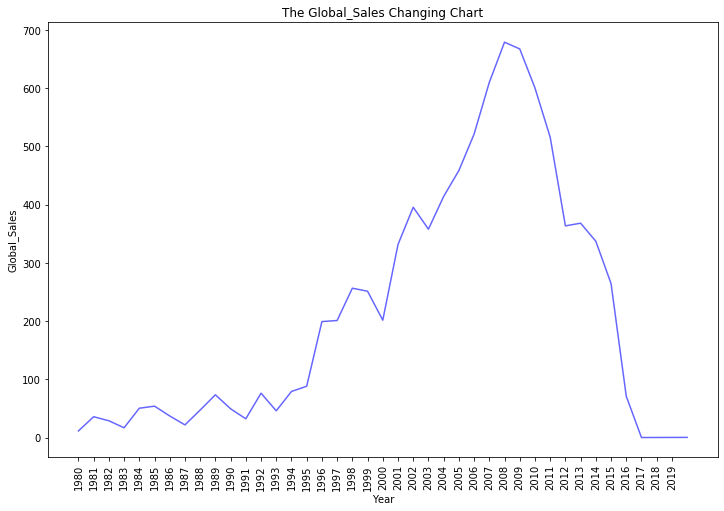

In [28]:
time=data.groupby('Year').agg({'Global_Sales':'sum'})

time.plot(alpha=0.6,figsize=(12,8),
         legend=False,color='Blue')

plt.xticks(np.arange(time.index.min(), time.index.max()),rotation=90)

plt.title('The Global_Sales Changing Chart')
plt.ylabel('Global_Sales')   

plt.show()

我们可以看到2016年往后的数据几乎为0，通过查阅原数据发现2017年的数据仅有3条，2018和2019年无数据，2020年数据只有1条，这和数据集的统计时间有关，2016年之后的数据可能并不是实际的数据，为了后续的处理我们将2017年以及之后的数据进行删除。因为我们要做的是每年总销售额的预测，因此我们将数据按年分组并计算每年的总销售额作为处理的数据，同时去除2017年和2020年的数据。

In [29]:
n_data=pd.DataFrame(data.groupby('Year').agg({'Global_Sales':np.sum}))
n_data=n_data.drop(n_data.index[38])
n_data=n_data.drop(n_data.index[37])
n_data.index=n_data.index.astype(str)
n_data.index=n_data.index.str.replace('\.0','')
n_data['Date_Time'] = pd.to_datetime(n_data.index)
n_data.index = n_data.Date_Time
n_data.drop(['Date_Time'],axis=1,inplace=True)

序列平稳性是进行时间序列分析的前提条件，因此我们利用ADF进行序列平稳性的检测。

In [30]:
from statsmodels.tsa.stattools import adfuller as ADF
ADF(n_data['Global_Sales'])

(-1.2173475829097993,
 0.6660890576244354,
 1,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 298.3129327658276)

从检验结果可以看出原时间序列不平稳，因此需要对原序列利用差分进行平稳处理。

一阶差分后序列ADF检验P值为(-8.03071139626576, 1.9618260443876915e-12, 0, 34, {'1%': -3.639224104416853, '5%': -2.9512301791166293, '10%': -2.614446989619377}, 278.47712099772235)


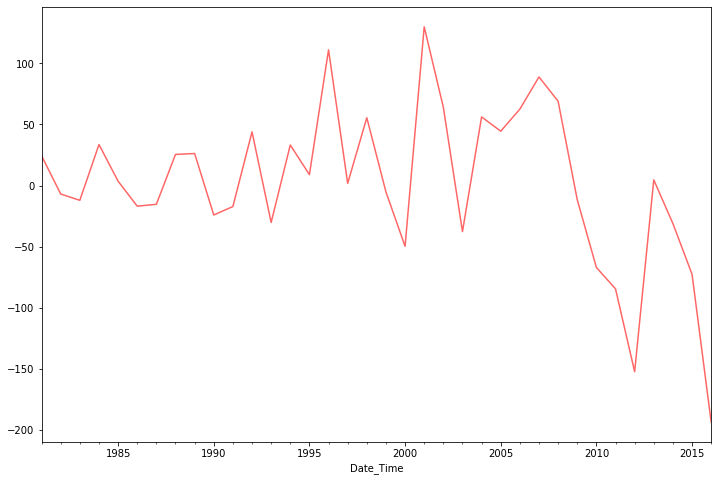

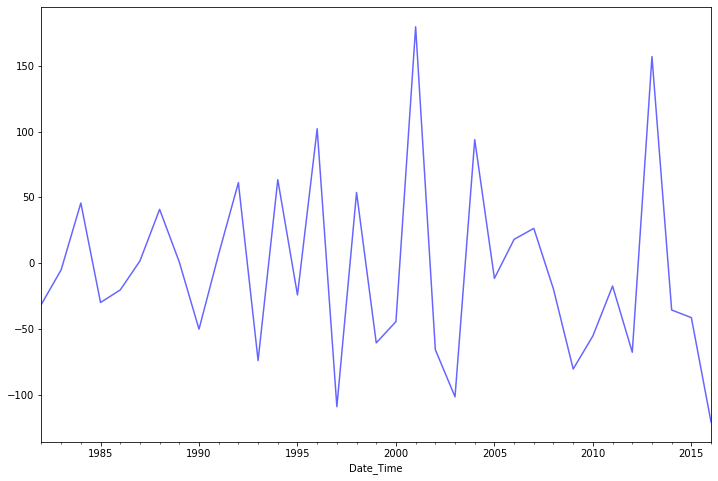

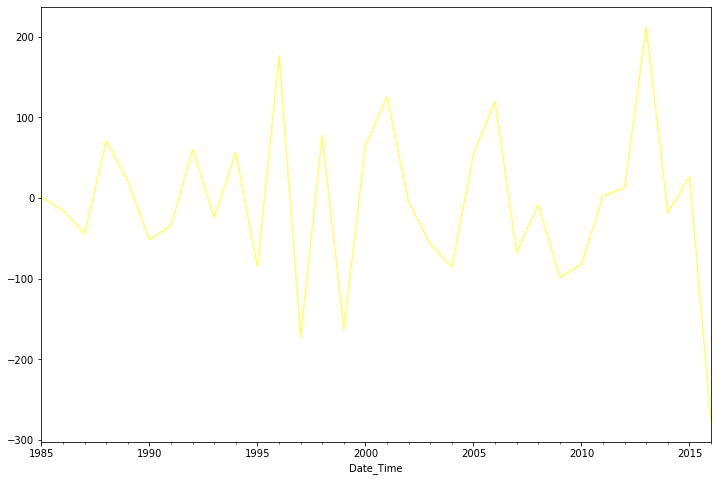

In [31]:
ts_diff_1=n_data.diff(1).dropna()   
ts_diff_2=ts_diff_1.diff(1).dropna()
ts_diff_3=ts_diff_2.diff(3).dropna()
print('一阶差分后序列ADF检验P值为{}'.format(ADF(ts_diff_2['Global_Sales'])))
ts_diff_1.plot(alpha=0.6,figsize=(12,8),legend=False,color='Red')
ts_diff_2.plot(alpha=0.6,figsize=(12,8),legend=False,color='Blue')
ts_diff_3.plot(alpha=0.6,figsize=(12,8),legend=False,color='Yellow')
plt.show()

从图中可以看出二阶差分后数据趋于平缓，二阶和三阶差分没有较大区别，并且从ADF检验结果看我们同样可以认为经过二阶差分后序列趋于平稳，因此选择进行二阶差分进行数据的平缓。下面利用acf和pacf图确定ARIMA的参数p和q。

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


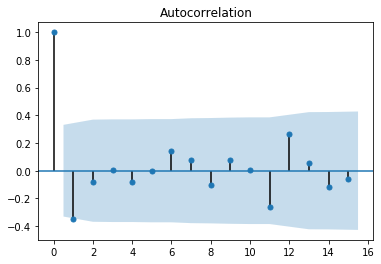

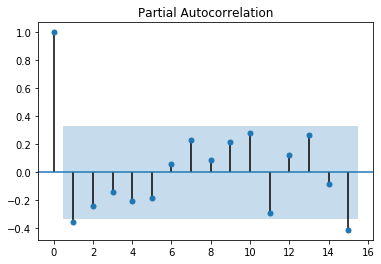

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf 
plot_acf(ts_diff_2,lags=15).show()
plot_pacf(ts_diff_2,lags=15).show()

根据结果我们取ARIMA的参数为（1，2，0）并利用D-W检验模型的性能优略

In [33]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson #DW检验
result_arma = sm.tsa.ARIMA(n_data,order=(1,2,0)).fit(disp=-1, method='css')#激活模型
predict_ts = result_arma.predict()

resid=result_arma.resid
print('D-W检验值为{}'.format(durbin_watson(resid.values)))


D-W检验值为2.0776666814476643


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


模型D-W的检验结果接近于2，我们认为残差序列不存在自相关性，因此我们认为模型具有比较好的性能。

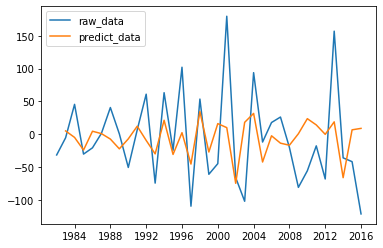

In [34]:
plt.plot(ts_diff_2,label='raw_data')
plt.plot(predict_ts,label='predict_data')

plt.legend()
plt.show()

从图中也可以看出模型得到了比较好的拟合效果。因此参数比较合适。

我们取前21年的数据作为训练数据，其余年份数据为测试数据进行模型训练及结果预测并展示结果。

predicted=288.858234, expected=331.470000
predicted=351.999361, expected=395.520000
predicted=475.750265, expected=357.850000
predicted=384.106609, expected=414.010000
predicted=407.208454, expected=458.510000
predicted=512.925896, expected=521.040000
predicted=575.343069, expected=609.920000
predicted=686.944404, expected=678.900000
predicted=764.364515, expected=667.300000
predicted=703.742585, expected=600.290000
predicted=557.461419, expected=515.800000
predicted=434.761447, expected=363.490000
predicted=235.334096, expected=368.110000
predicted=283.987070, expected=337.030000
predicted=321.420041, expected=264.440000
predicted=207.686299, expected=70.900000
Test MSE: 5737.620


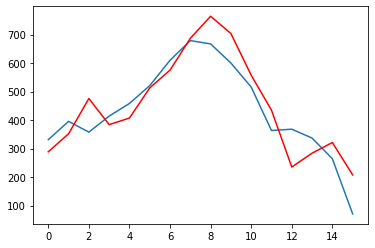

In [35]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson #DW检验
from sklearn.metrics import mean_squared_error
X=n_data.values
train, test = X[0:20], X[21:len(n_data)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):

    model = sm.tsa.ARIMA(history, order=(1,2,0))

    model_fit = model.fit()

    output = model_fit.forecast()

    yhat = output[0]

    predictions.append(yhat)

    obs = test[t]

    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)

print('Test MSE: %.3f' % error)

# plot

plt.plot(test)

plt.plot(predictions, color='red')

plt.show()

蓝色曲线为原始数据，红色曲线为预测数据。可以看到拟合效果较好，总体上看模型取得了比较好结果，但仍有改进空间。

### 4.2 多特征预测

销售额不只受时间的影响，我们同样要考虑其他数据列的影响因素。
接下来加入发行平台、类型以及发行商等数据列利用线性回归的方法进行销售额预测。仍然是去除2017和2020年的数据，并且去除其余的数据特征。同时要将数据进行数据化方便后续的处理。利用预测的准确率对模型进行评价。

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

n1_data=data.drop([38,37])
number = LabelEncoder()
n1_data['Platform'] = number.fit_transform(n1_data['Platform'].astype('str'))
n1_data['Genre'] = number.fit_transform(n1_data['Genre'].astype('str'))
n1_data['Publisher'] = number.fit_transform(n1_data['Publisher'].astype('str'))

dff = n1_data.drop(['Rank','Name'], axis =1)

df3 = dff.drop(['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'], axis =1)

columns = ["Platform", "Genre", "Publisher","Year","NA_Sales", "EU_Sales"]
  
labels = df3["Global_Sales"].values
features = dff[list(columns)].values

regr = linear_model.LinearRegression()

X = features
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler = StandardScaler()
#scaler = preprocessing.MinMaxScaler()

# Fit only on training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

regr.fit(X_train, y_train)

Accuracy = regr.score(X_train, y_train)
print( "训练数据的准确率: ", Accuracy)

accuracy = regr.score(X_test, y_test)
print ("测试数据准确率", accuracy)



训练数据的准确率:  0.9615580895827357
测试数据准确率 0.9702853763285915


我们可以看到通过线性回归的预测准确率比较高，得到了比较好的结果。